## GPT迁移GLM
> 快速迁移指南，帮您只需修改三处变量，就可以完成业务迁移

In [1]:
!pip install openai

In [2]:
import os
import sys
import logging
import logging.config
  
import openai
from openai import OpenAI
 
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
                    handlers=[logging.StreamHandler(sys.stdout)])



os.environ["OPENAI_API_KEY"] =  os.environ.get("ZHIPUAI_API_KEY")


## 30秒快速更换
- 用OpenAI SDK修改环境变量或显式参数跑通GLM-4-0520

In [3]:
client = OpenAI(
    # api_key="YOUR_API_KEY",
    base_url="https://open.bigmodel.cn/api/paas/v4/"
)
response = client.chat.completions.create(
    model="glm-4-0520",
    messages=[
        {
            "role": "user",
            "content": "你好"
        }
    ],
    top_p=0.7,
    temperature=0.1,
    max_tokens=2000,
)
logger.info("\033[1;32m" + f"client: {response}" + "\033[0m")


2024-07-02 11:44:02,677 - httpx - INFO - HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"
2024-07-02 11:44:02,689 - __main__ - INFO - client: ChatCompletion(id='8801668370939739010', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='你好👋！我是人工智能助手智谱清言（ChatGLM），很高兴见到你，欢迎问我任何问题。', role='assistant', function_call=None, tool_calls=None))], created=1719891842, model='glm-4-0520', object=None, service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=28, prompt_tokens=6, total_tokens=34), request_id='8801668370939739010')


- 用OPENAI转换文本到矢量，这个示例，将文本“你好”输出1024维的矢量空间

In [21]:
client = OpenAI(

    # api_key="YOUR_API_KEY",
    base_url="https://open.bigmodel.cn/api/paas/v4/"
)
output = client.embeddings.create(
    model="embedding-2",
    input="你好",
)

logger.info("\033[1;32m" + f"len(output.data) == 1：{len(output.data) == 1}" + "\033[0m")

logger.info("\033[1;32m" + f"len(output.data[0].embedding) == 1024：{len(output.data[0].embedding) == 1024}" + "\033[0m")



2024-07-02 11:50:38,679 - httpx - INFO - HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/embeddings "HTTP/1.1 200 OK"
2024-07-02 11:50:38,690 - __main__ - INFO - len(output.data) == 1：True
2024-07-02 11:50:38,691 - __main__ - INFO - len(output.data[0].embedding) == 1024：True


- 工具无需修改，既可一键切换

In [27]:
client = OpenAI(
    # api_key="YOUR_API_KEY",
    base_url="https://open.bigmodel.cn/api/paas/v4/"
)
response = client.chat.completions.create(
    model="glm-4-0520",
    messages=[
        {
            "role": "user",
            "content": "帮我查询天气"
        }
    ],
    tools=[
        {
            "type": "function",
            "function": {
                "name": "get_current_weather",
                "description": "Get the current weather in a given location",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "location": {
                            "type": "string",
                            "description": "The city and state, e.g. San Francisco, CA"
                        },
                        "unit": {
                            "type": "string",
                            "enum": [
                                "celsius",
                                "fahrenheit"
                            ]
                        }
                    },
                    "required": [
                        "location"
                    ]
                }
            }
        }
    ],
    top_p=0.7,
    temperature=0.1,
    max_tokens=2000,
)

logger.info("\033[1;32m" + f"response.choices[0].finish_reason: {response.choices[0].finish_reason}" + "\033[0m")
logger.info("\033[1;32m" + f"response.choices[0].message.tool_calls: {response.choices[0].message.tool_calls}" + "\033[0m")


2024-07-02 11:55:15,023 - httpx - INFO - HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"
2024-07-02 11:55:15,029 - __main__ - INFO - response.choices[0].finish_reason: tool_calls
2024-07-02 11:55:15,031 - __main__ - INFO - response.choices[0].message.tool_calls: [ChatCompletionMessageToolCall(id='call_8801668542738451167', function=Function(arguments='{"location": "北京"}', name='get_current_weather'), type='function', index=0)]


## 智能体的交互
> 构建带有Action的智能体，现在您只需要让LLM知道调用的函数，强大的LLM就会帮你架起自然语言通往程序世界交互的入口

In [29]:
!pip install git+https://github.com/MetaGLM/langchain-zhipuai.git -v


Using pip 24.0 from /media/gpt4-pdf-chatbot-langchain/pyenv-glm-cookbook/lib/python3.10/site-packages/pip (python 3.10)
  Cloning https://github.com/MetaGLM/langchain-zhipuai.git to /tmp/pip-req-build-qk7msys2
  Running command git version
  git version 2.45.2
  Running command git clone --filter=blob:none https://github.com/MetaGLM/langchain-zhipuai.git /tmp/pip-req-build-qk7msys2
  正克隆到 '/tmp/pip-req-build-qk7msys2'...
  正在更新文件:   2% (2/70)
  正在更新文件:   4% (3/70)
  正在更新文件:   5% (4/70)
  正在更新文件:   7% (5/70)
  正在更新文件:   8% (6/70)
  正在更新文件:  10% (7/70)
  正在更新文件:  11% (8/70)
  正在更新文件:  12% (9/70)
  正在更新文件:  14% (10/70)
  正在更新文件:  15% (11/70)
  正在更新文件:  17% (12/70)
  正在更新文件:  18% (13/70)
  正在更新文件:  20% (14/70)
  正在更新文件:  21% (15/70)
  正在更新文件:  22% (16/70)
  正在更新文件:  24% (17/70)
  正在更新文件:  25% (18/70)
  正在更新文件:  27% (19/70)
  正在更新文件:  28% (20/70)
  正在更新文件:  30% (21/70)
  正在更新文件:  31% (22/70)
  正在更新文件:  32% (23/70)
  正在更新文件:  34% (24/70)
  正在更新文件:  35% (25/70)
  正在更新文件:  37% (26/70)
  正在更新文件

In [5]:

from langchain.chains import LLMChain
from langchain_core.prompts import PromptTemplate
from langchain_zhipuai import ChatZhipuAI
from langchain_zhipuai.embeddings.base import ZhipuAIEmbeddings
from langchain_core.messages import AIMessage
from langchain_core.runnables import (
    Runnable,
    RunnableLambda,
    RunnableMap,
    RunnablePassthrough,
)
from langchain_core.tools import tool
from langchain_zhipuai.agents.zhipuai_all_tools import (
    ZhipuAIAllToolsRunnable,
)
from langchain_zhipuai.agents.zhipuai_all_tools.base import (
    AllToolsAction,
    AllToolsActionToolEnd,
    AllToolsActionToolStart,
    AllToolsFinish,
    AllToolsLLMStatus,
)
from langchain_zhipuai.callbacks.agent_callback_handler import (
    AgentStatus,
)

### 对话
> 更加清晰的交互代码

In [33]:


llm = ChatZhipuAI(
    model_name="glm-4-0520",
    # openai_api_key="YOUR_API_KEY",
)
template = """Question: {question}

Answer: Let's think step by step."""

prompt = PromptTemplate.from_template(template)

llm_chain = LLMChain(prompt=prompt, llm=llm)
responses = llm_chain.run("你好")
logger.info("\033[1;32m" + f"llm_chain: {responses}" + "\033[0m")


2024-07-02 12:04:59,326 - httpx - INFO - HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/chat/completions "HTTP/1.1 200 OK"
2024-07-02 12:04:59,340 - __main__ - INFO - llm_chain: 你好！有什么可以帮助你的吗？


## 文本矢量转换
> 为使用Embedding的程序提供对文档（要搜索）与查询（搜索查询本身）不同的方法。

In [37]:
documents = ["foo bar"]
embedding = ZhipuAIEmbeddings()
output = embedding.embed_documents(documents) 

logger.info("\033[1;32m" + f"len(output) == 1：{len(output) == 1}" + "\033[0m")

logger.info("\033[1;32m" + f"len(output[0]) == 1024：{len(output[0]) == 1024}" + "\033[0m")


2024-07-02 12:09:08,523 - httpx - INFO - HTTP Request: POST https://open.bigmodel.cn/api/paas/v4/embeddings "HTTP/1.1 200 OK"
2024-07-02 12:09:08,551 - __main__ - INFO - len(output) == 1：True
2024-07-02 12:09:08,553 - __main__ - INFO - len(output[0]) == 1024：True


## 智能体的基础交互
> 定义调用的函数，打开入口

In [3]:

@tool
def multiply(first_int: int, second_int: int) -> int:
    """Multiply two integers together."""
    return first_int * second_int


@tool
def add(first_int: int, second_int: int) -> int:
    "Add two integers."
    return first_int + second_int


@tool
def exponentiate(base: int, exponent: int) -> int:
    "Exponentiate the base to the exponent power."
    return base ** exponent

 
llm = ChatZhipuAI(
    model="glm-4-0520",
    streaming=True, 
)

tools = [multiply, exponentiate, add]
llm_with_tools = llm.bind_tools(tools)
tool_map = {tool.name: tool for tool in tools}

def call_tools(msg: AIMessage) -> Runnable:
    """Simple sequential tool calling helper."""
    tool_map = {tool.name: tool for tool in tools}
    tool_calls = msg.tool_calls.copy()
    for tool_call in tool_calls:
        tool_call["output"] = tool_map[tool_call["name"]].invoke(tool_call["args"])
    return tool_calls

chain = llm_with_tools | call_tools
out = chain.invoke(
    "23乘以7"
)
print(out)

[{'name': 'multiply', 'args': {'first_int': 23, 'second_int': 7}, 'id': 'call_8801675002369455287', 'output': 161}]


## 智能体的基础交互


## 智能体ALLTOOLS，让您的应用细节拉满，我们提供了快速迁移智能体框架
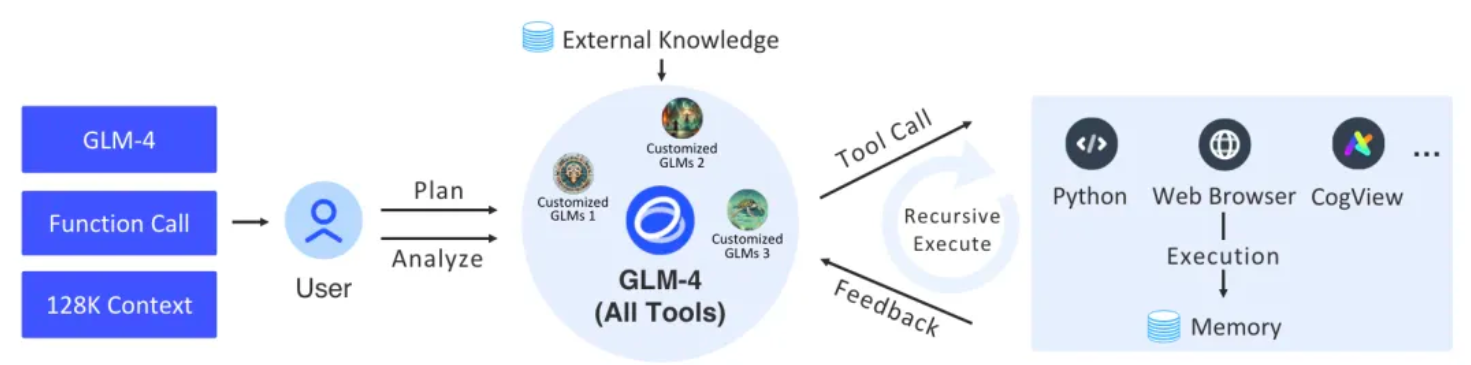 


### 多工具调用，更加智能

In [8]:
 
agent_executor = ZhipuAIAllToolsRunnable.create_agent_executor(
    model_name="glm-4-alltools",
    tools=[multiply, exponentiate, add],
)
chat_iterator = agent_executor.invoke(chat_input="计算下 23乘以7，5乘以18，加上100万加上10亿，再加上37")
async for item in chat_iterator:
    if isinstance(item, AllToolsAction):
        print("AllToolsAction:" + str(item.to_json()))

    elif isinstance(item, AllToolsFinish):
        print("AllToolsFinish:" + str(item.to_json()))

    elif isinstance(item, AllToolsActionToolStart):
        print("AllToolsActionToolStart:" + str(item.to_json()))

    elif isinstance(item, AllToolsActionToolEnd):
        print("AllToolsActionToolEnd:" + str(item.to_json()))
    elif isinstance(item, AllToolsLLMStatus):
        if item.status == AgentStatus.llm_end:
            print("llm_end:" + item.text)




> Entering new ZhipuAiAllToolsAgentExecutor chain...
llm_end:
AllToolsAction:{"run_id": "078b5fad-e8e6-4306-b402-5a1cfd8e9540", "status": 4, "tool": "multiply", "tool_input": {"first_int": 23, "second_int": 7}, "log": "\nInvoking: `multiply` with `{'first_int': 23, 'second_int': 7}`\n\n\n", "class_name": "AllToolsAction"}

Invoking: `multiply` with `{'first_int': 23, 'second_int': 7}`


AllToolsActionToolStart:{"run_id": "c01690e6-222d-42d7-88ba-e7b73627dbac", "status": 6, "tool": "multiply", "tool_input": "{'first_int': 23, 'second_int': 7}", "class_name": "AllToolsActionToolStart"}
AllToolsActionToolEnd:{"run_id": "c01690e6-222d-42d7-88ba-e7b73627dbac", "status": 7, "tool": "multiply", "tool_output": "161", "class_name": "AllToolsActionToolEnd"}
161llm_end:根据您的要求，我们需要先计算23乘以7，然后计算5乘以18，接着将这两个结果相加，最后再加上100万和10亿，最后再加上37。具体步骤如下：

1. 计算23乘以7：
23 * 7 = 161

2. 计算5乘以18：
5 * 18 = 90

3. 将23乘以7的结果与5乘以18的结果相加：
161 + 90 = 251

4. 将251加上100万和10亿：
251 + 1000000 + 1000000000 = 100100251

5. 最后再

## 演示leetcode刷题
> 两数相加，https://leetcode.com/problems/two-sum/

In [10]:

agent_executor = ZhipuAIAllToolsRunnable.create_agent_executor(
    model_name="glm-4-alltools",
    tools=[
        {"type": "code_interpreter"},
    ]
)
chat_iterator = agent_executor.invoke(chat_input="""Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

 

Example 1:

Input: nums = [2,7,11,15], target = 9
Output: [0,1]
Explanation: Because nums[0] + nums[1] == 9, we return [0, 1].
Example 2:

Input: nums = [3,2,4], target = 6
Output: [1,2]
Example 3:

Input: nums = [3,3], target = 6
Output: [0,1]
 

Constraints:

2 <= nums.length <= 104
-109 <= nums[i] <= 109
-109 <= target <= 109
Only one valid answer exists.
 

Follow-up: Can you come up with an algorithm that is less than O(n2) time complexity?""")
async for item in chat_iterator:
    if isinstance(item, AllToolsAction):
        print("AllToolsAction:" + str(item.to_json()))

    elif isinstance(item, AllToolsFinish):
        print("AllToolsFinish:" + str(item.to_json()))

    elif isinstance(item, AllToolsActionToolStart):
        print("AllToolsActionToolStart:" + str(item.to_json()))

    elif isinstance(item, AllToolsActionToolEnd):
        print("AllToolsActionToolEnd:" + str(item.to_json()))
    elif isinstance(item, AllToolsLLMStatus):
        if item.status == AgentStatus.llm_end:
            print("llm_end:" + item.text)




> Entering new ZhipuAiAllToolsAgentExecutor chain...
llm_end:Certainly, one way to solve this problem with a time complexity better than $O(n^2)$ is by using a hash map (or dictionary) to store the values and their indices. This approach will have a time complexity of $O(n)$ and a space complexity of $O(n)$.

Here's how the algorithm works:

1. Initialize an empty dictionary (or hash map).
2. Loop through the array `nums`.
    1. For each number in `nums`, calculate the difference between the target and the current number.
    2. If the difference is in the dictionary, return the current index and the index in the dictionary.
    3. Otherwise, add the current number and its index to the dictionary.
3. If the loop completes without returning, it means there is no solution.

Let's implement this algorithm:The function correctly returns the expected indices for the provided test cases:

1. For `nums = [2,7,11,15]` and `target = 9`, the output is `[0, 1]` (indicating that `nums[0] + nums

In [15]:
#### 轻松的实现上下文交互
> 只需要继续调用invoke，继续之前的话题

SyntaxError: invalid character '，' (U+FF0C) (822403747.py, line 2)

In [14]:
chat_iterator = agent_executor.invoke(chat_input="""放在这个代码块
from typing import List

class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
""")
async for item in chat_iterator:
    if isinstance(item, AllToolsAction):
        print("AllToolsAction:" + str(item.to_json()))

    elif isinstance(item, AllToolsFinish):
        print("AllToolsFinish:" + str(item.to_json()))

    elif isinstance(item, AllToolsActionToolStart):
        print("AllToolsActionToolStart:" + str(item.to_json()))

    elif isinstance(item, AllToolsActionToolEnd):
        print("AllToolsActionToolEnd:" + str(item.to_json()))
    elif isinstance(item, AllToolsLLMStatus):
        if item.status == AgentStatus.llm_end:
            print("llm_end:" + item.text)



> Entering new ZhipuAiAllToolsAgentExecutor chain...
Certainly, you can place the `two_sum` function within the `Solution` class. Here's how you can do it:

```python
from typing import List

class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        # Create a dictionary to store the numbers and their indices
        num_map = {}
        
        # Iterate through the list of numbers
        for index, num in enumerate(nums):
            # Calculate the complement of the current number
            complement = target - num
            
            # If the complement is in the dictionary, return the indices
            if complement in num_map:
                return [num_map[complement], index]
            
            # Otherwise, add the current number and its index to the dictionary
            num_map[num] = index
        
        # If no pair is found, the function will return an empty list
        return []

# Example usage:
# solution = Solution